## Importing Dependencies

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, ConvLSTM2D, Flatten, Conv1D, Reshape, AveragePooling1D
import numpy as np
from tensorflow import keras
import random
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [0]:
from data import getDataLSTM

## Mounting Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = 'drive/My Drive/data_numpy/'

## Getting Labels

In [0]:
from labels import getLabels

In [0]:
labels_to_idx, idx_to_labels = getLabels('drive/My Drive/data_numpy/')

In [9]:
list(zip(labels_to_idx, idx_to_labels))

[('lakshya', 0),
 ('ravinder', 1),
 ('vinay', 2),
 ('jagrit', 3),
 ('sanket', 4),
 ('dash', 5),
 ('shrey', 6),
 ('vaibhav', 7),
 ('akbar', 8),
 ('kartik', 9),
 ('aman', 10),
 ('priyanka', 11),
 ('goel', 12),
 ('shruti', 13),
 ('shivam', 14),
 ('prateek', 15),
 ('staff', 16),
 ('saboo', 17),
 ('bhairevi', 18),
 ('anurag', 19),
 ('samridh', 20),
 ('rashmi', 21),
 ('pradeep', 22),
 ('praveen', 23)]

## LSTM Model


In [0]:
# define model
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(None,50)))
model.add(keras.layers.RepeatVector(37))
model.add(keras.layers.TimeDistributed(Dense(5)))
model.add(LSTM(512, activation='relu', return_sequences=True))
model.add(keras.layers.TimeDistributed(Dense(50)))
model.add(Flatten())
model.add(Reshape((1850, 1)))
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', padding='same', input_shape=(1850,1)))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=22, kernel_size=1, padding='same', activation='relu'))
model.add(AveragePooling1D(pool_size=1850))
model.add(Flatten())
model.add(Dense(22, activation='softmax'))

## Optimizer

In [0]:
 adam = tf.keras.optimizers.Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.999)

## Model Compile

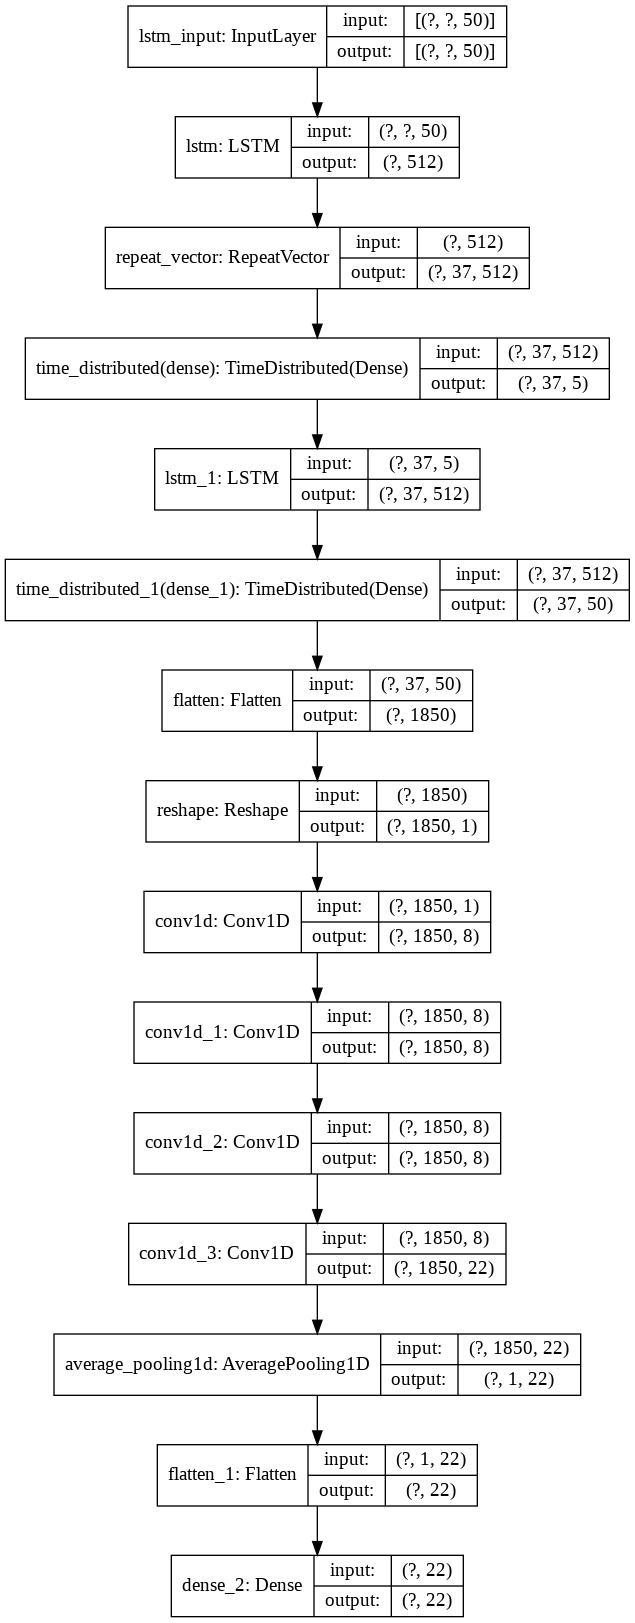

In [12]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True, to_file='lstm_encoder.png')

## Train Test Split

In [0]:
train_data, test_data = getDataLSTM(root, batch_size=10)

## Model Fit

In [15]:
# fit model
model.fit(train_data.repeat(1), epochs=50, verbose=1, validation_data=test_data)

Epoch 1/50
9/9 [==============================] - 1s 92ms/step - loss: 744.6409 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 1s 84ms/step - loss: 768.4599 - accuracy: 0.0000e+00 - val_loss: 2615.4018 - val_accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 1s 85ms/step - loss: 76057.7816 - accuracy: 0.0000e+00 - val_loss: 7383.8517 - val_accuracy: 0.0000e+00
Epoch 4/50
9/9 [==============================] - 1s 85ms/step - loss: 67636.5118 - accuracy: 0.0000e+00 - val_loss: 720111.7500 - val_accuracy: 0.0000e+00
Epoch 5/50
9/9 [==============================] - 1s 90ms/step - loss: 1912024.5360 - accuracy: 0.0000e+00 - val_loss: 7084301.3333 - val_accuracy: 0.0000e+00
Epoch 6/50
9/9 [==============================] - 1s 90ms/step - loss: 18479068.0147 - accuracy: 0.0000e+00 - val_loss: 41068289.3333 - val_accuracy: 0.0000e+00
Epoch 7/50
9/9 [==============================] - 1s 91ms/step - 

## Model Predict

In [0]:
y_pred = model.predict(test_data, verbose=0,)

In [17]:
y_pred.shape

(28, 22)

In [18]:
y_pred 

array([[4.75380011e-02, 6.04698323e-02, 6.87827989e-02, 3.05451173e-02,
        3.32358330e-02, 6.42473921e-02, 5.90271167e-02, 2.03929357e-02,
        2.34855227e-02, 2.72568017e-02, 7.55770802e-02, 3.73064652e-02,
        2.16627158e-02, 4.94463220e-02, 5.18704653e-02, 4.29901890e-02,
        3.95160913e-02, 5.76030836e-02, 2.41179429e-02, 3.42020541e-02,
        9.37568620e-02, 3.69693898e-02],
       [4.53714691e-02, 6.55878559e-02, 7.85422549e-02, 2.46706456e-02,
        2.76522990e-02, 7.08688051e-02, 6.21173605e-02, 1.28035611e-02,
        1.64105706e-02, 2.02091932e-02, 9.06844586e-02, 3.20401490e-02,
        1.46316113e-02, 5.00249155e-02, 5.28524630e-02, 3.86021622e-02,
        3.44949439e-02, 6.08321168e-02, 1.70781612e-02, 2.76511610e-02,
        1.25062525e-01, 3.18113416e-02],
       [6.71515246e-28, 8.18741799e-18, 1.80828985e-13, 0.00000000e+00,
        0.00000000e+00, 2.47352176e-16, 1.44835900e-20, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.14696466e-08

## Encoder Model



In [0]:
model = keras.models.Model(inputs=model.inputs, outputs=model.layers[5].output)

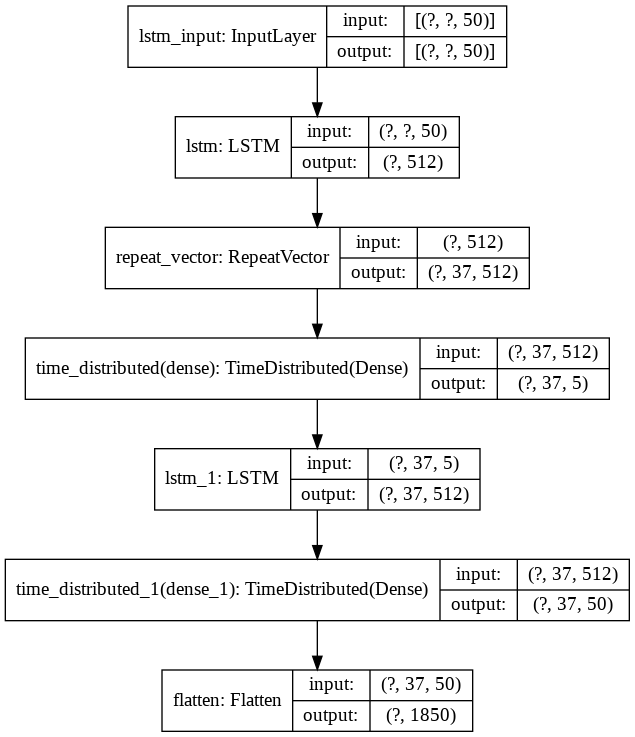

In [21]:
keras.utils.plot_model(model, show_shapes=True, to_file='lstm_encoder.png')

In [22]:
#feature vector for the input sequence
yhat = model.predict(test_data)
print(yhat.shape)
print(yhat)

(28, 1850)
[[ 4.7880182e-01  3.2756865e-01 -3.8896587e-01 ...  7.9367798e+01
   5.8387188e+01  9.5840050e+01]
 [ 1.8625327e+00  1.8293277e+00 -1.9879541e+00 ...  4.9731235e+03
   3.2112527e+03  6.1742505e+03]
 [ 3.4299663e-01  2.4297222e-01 -2.8156599e-01 ...  1.0635579e+00
   3.2064989e+00  4.3079162e+00]
 ...
 [ 3.0778906e-01  2.2210288e-01 -2.5371245e-01 ...  4.0197125e-01
   2.0214021e+00  2.5610881e+00]
 [ 1.4760048e+00  1.3245417e+00 -1.4880376e+00 ...  1.8853416e+03
   2.5739270e+03  4.3315820e+03]
 [ 4.0174183e-01  2.7628341e-01 -3.2583195e-01 ...  1.1409971e+01
   1.0982467e+01  1.7533339e+01]]
